# 📌 1. What is Logistic Regression?

**Logistic Regression** is a supervised machine learning algorithm used primarily for **binary classification** tasks. Unlike linear regression which predicts continuous values, logistic regression outputs a **probability** between 0 and 1 by applying the **sigmoid function** to a linear combination of input features.

### 🔢 Key Concepts:
- Uses **sigmoid/logistic function** to map outputs between 0 and 1.
- The result is interpreted as the **probability of belonging to class 1**.
- Often used for classification tasks like:
  - Spam detection (spam vs. not spam)
  - Fraud detection
  - Disease prediction (yes/no)

### 🧠 Logistic Function (Sigmoid):
$$
\sigma(z) = \frac{1}{1 + e^{-z}} \quad \text{where} \quad z = w_0 + w_1x_1 + ... + w_nx_n
$$
If the result is > 0.5 → class 1, else → class 0.

# 🧭 Table of Contents
1. [Introduction](#Introduction)
2. [What is Logistic Regression?](#What-is-Logistic-Regression?)
3. [Use Cases](#Use-Cases)
4. [Math Behind Logistic Regression](#Math-Behind-Logistic-Regression)
5. [Easy Dataset - Modeling](#Easy-Dataset---Modeling)
6. [Medium Dataset - Modeling](#Medium-Dataset---Modeling)
7. [Complex Dataset - Modeling](#Complex-Dataset---Modeling)
8. [Hyperparameter Tuning](#Hyperparameter-Tuning)
9. [Evaluation Metrics](#Evaluation-Metrics)
10. [Conclusion & Resources](#Conclusion-&-Resources)

===========================================================================================================================================================

# 📌 2. Real-world Use Cases

Logistic Regression is popular in domains where **binary outcomes** are common and interpretability is important:

### ✅ Popular Applications:
- **Healthcare**: Predicting disease (e.g., diabetes, cancer risk)
- **Finance**: Credit default prediction
- **Marketing**: Customer churn prediction
- **Cybersecurity**: Email spam detection
- **HR**: Employee attrition prediction

Its performance and ease of explanation to stakeholders make it a great baseline model in many industries.

# 📌 3. Math Behind Logistic Regression

Logistic Regression uses a **linear combination of features** and passes it through the **sigmoid function** to get probabilities.

### 🧮 Step-by-Step Intuition:
1. Compute a linear score:
$$
z = w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n
$$

2. Convert score to probability:
$$
p = \sigma(z) = \frac{1}{1 + e^{-z}}
$$

3. Predict class:
- If p > 0.5 → predict 1
- If p ≤ 0.5 → predict 0

4. Optimize parameters using **Log Loss**:
$$
\text{LogLoss} = -\frac{1}{n} \sum (y_i \log(p_i) + (1 - y_i)\log(1 - p_i))
$$

Logistic Regression tries to **minimize Log Loss** using optimization techniques like **Gradient Descent**.

# 📌 4. Dataset Walkthroughs (Easy → Very Complex)

Understanding how Logistic Regression behaves across datasets of different complexity is key to mastering it. Below is the dataset roadmap we’ll use:

### 🟢 Easy Level
- **Synthetic dataset** with 6 features (e.g., Glucose, BMI)
- Balanced classes, clean data, no noise
- Goal: Understand logistic regression mechanics

### 🟡 Medium Level
- Slightly imbalanced dataset (e.g., Titanic survival)
- Categorical features requiring encoding
- Missing values and basic preprocessing

### 🟠 Complex Level
- High-dimensional real-world data (e.g., Credit card fraud)
- Requires scaling, regularization, class imbalance techniques
- Involves feature selection or PCA

### 🔴 Very Complex Level
- Text classification or multi-class problems (e.g., Sentiment analysis)
- Involves TF-IDF vectorization, NLP preprocessing
- Requires robust evaluation with AUC, Log Loss, etc.

---

Each level will help us explore:
- How logistic regression performs
- Which preprocessing steps are necessary
- How to interpret and tune performance

# 📌 5. Building Models at Each Level

Now let’s walk through how to build Logistic Regression models for each dataset complexity — from beginner-friendly to real-world scale. Each level demonstrates different challenges and modeling strategies.

---

### 🟢 Easy Level: Synthetic Dataset
- Dataset: Generated with `sklearn.datasets.make_classification`
- Characteristics: Clean, small, balanced classes, no missing values
- Goal: Focus purely on logistic regression behavior

**Key Steps:**
- No preprocessing required
- Split data → Fit model → Evaluate accuracy, confusion matrix

---

### 🟡 Medium Level: Titanic Survival Dataset
- Dataset: Classic binary classification problem
- Characteristics: Mix of categorical and numerical data, some missing values
- Goal: Learn preprocessing steps and model handling of imbalance

**Key Steps:**
- Handle missing values (e.g., fill age with median)
- Encode categorical variables (e.g., `Sex`, `Embarked`)
- Scale numerical features
- Use `class_weight='balanced'` to deal with slight class imbalance

---

### 🟠 Complex Level: Credit Card Fraud Detection
- Dataset: Highly imbalanced, noisy, anonymized features
- Characteristics: ~280,000 rows, 1% fraud cases
- Goal: Model performance under high class imbalance and data volume

**Key Steps:**
- Apply `StandardScaler` to features
- Use undersampling / SMOTE for imbalance
- Evaluate using AUC, F1 instead of accuracy
- Tune regularization with `GridSearchCV`

---

### 🔴 Very Complex Level: NLP/Text Sentiment Analysis
- Dataset: IMDb reviews (binary sentiment)
- Characteristics: Textual data → needs NLP transformation
- Goal: Handle TF-IDF + dimensionality + multi-step preprocessing

**Key Steps:**
- Clean and tokenize text
- Convert to numerical with TF-IDF
- Use `LogisticRegression(solver='saga')` for sparse input
- Perform hyperparameter tuning with `RandomizedSearchCV`
- Evaluate with ROC-AUC and log loss

---

Each of these models will follow:
> 🧪 Preprocessing → 🔧 Model Definition → 🚀 Training → 📊 Evaluation

# 📌 6. Hyperparameter Tuning Deep Dive

Tuning hyperparameters can significantly improve the performance of your Logistic Regression model, especially as dataset complexity increases.

---

### 🎯 Why Tune Hyperparameters?

Hyperparameters control **how** your model learns. In Logistic Regression, tuning helps with:
- **Regularization strength**
- **Solver optimization**
- **Convergence speed**
- **Model complexity control**

---

### 🔧 Key Hyperparameters to Tune

| Hyperparameter | Purpose | Notes |
|----------------|---------|-------|
| `C` | Inverse of regularization strength | Smaller values specify stronger regularization |
| `penalty` | Type of regularization to apply (`l1`, `l2`, `elasticnet`) | Depends on solver |
| `solver` | Algorithm used in optimization (`liblinear`, `saga`, `newton-cg`) | `liblinear` works with small datasets, `saga` for large or sparse |
| `max_iter` | Maximum number of iterations to converge | Increase if model doesn't converge |
| `class_weight` | Handles class imbalance | `'balanced'` adjusts weights automatically |

---

### ⚙️ Tuning Strategies by Dataset Level

| Complexity | Tuning Method | Tools |
|------------|----------------|-------|
| Easy | Manual trial-and-error | Default parameters work well |
| Medium | GridSearchCV | Explore combinations of 2-3 key params |
| Complex | RandomizedSearchCV | Sample from hyperparameter space efficiently |
| Very Complex | Optuna / Bayesian Optimization | Intelligent search based on performance history |

---

### 🔍 Example: Grid Search on Medium Dataset

```python
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear']
}

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='f1')
grid.fit(X_train, y_train)

print(\"Best Params:\", grid.best_params_)

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import make_classification
import pandas as pd

# 1. Generate synthetic data
X, y = make_classification(n_samples=500,
                           n_features=6,
                           n_informative=4,
                           n_redundant=0,
                           class_sep=2.0,
                           flip_y=0.01,
                           random_state=42)

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Define hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear']
}

# 4. Apply GridSearchCV
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='f1')
grid.fit(X_train, y_train)

# 5. Best parameters
print("✅ Best Parameters:", grid.best_params_)

✅ Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


# 📌 7. Evaluating a Model: Metrics to Monitor

Evaluating a model correctly is just as important as building it — especially in classification tasks where accuracy alone can be misleading (especially on imbalanced datasets).

---

### 🔍 Core Evaluation Metrics for Logistic Regression

| Metric | Goal | Use When | Formula/Explanation |
|--------|------|----------|---------------------|
| **Accuracy** | Higher is better | Balanced datasets | % of correctly predicted labels |
| **Precision** | Higher is better | Cost of false positives is high | TP / (TP + FP) |
| **Recall** | Higher is better | Cost of false negatives is high | TP / (TP + FN) |
| **F1 Score** | Higher is better | Imbalanced datasets | Harmonic mean of Precision and Recall |
| **AUC-ROC** | Higher is better | Probabilistic separability | Area under the ROC Curve |
| **Log Loss** | Lower is better | Probabilistic predictions | Penalizes wrong confident predictions |

---

### 📈 How to Use Them in Practice

- **Confusion Matrix**: Helps break down TP, TN, FP, FN visually
- **Classification Report**: Combines all important scores
- **ROC Curve**: Visualize model's ability to distinguish classes
- **Threshold Tuning**: Change cutoff probability from 0.5 to optimize F1 or recall

---

### 🧪 Sample Code to Evaluate Model


In [2]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Predict
y_pred = grid.predict(X_test)
y_proba = grid.predict_proba(X_test)[:, 1]

# Classification report
print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("🧾 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# AUC Score
print("n📈 ROC AUC Score:", roc_auc_score(y_test, y_proba))

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.84      0.80        49
           1       0.83      0.75      0.78        51

    accuracy                           0.79       100
   macro avg       0.79      0.79      0.79       100
weighted avg       0.79      0.79      0.79       100

🧾 Confusion Matrix:
[[41  8]
 [13 38]]
n📈 ROC AUC Score: 0.8907563025210085


### 🔍 Interpretation:
- The model performs **fairly balanced** across both classes.
- Slight trade-off between **precision and recall**.
- **AUC of 0.89** indicates strong class separability — excellent for an easy-level dataset!

---

### 📚 Additional Learning Resources

- [sklearn LogisticRegression Docs](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- [Visual Introduction to Logistic Regression](https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc)
- [Confusion Matrix Explained](https://ml-cheatsheet.readthedocs.io/en/latest/classification.html)

---

### 🔗 GitHub Repo & Medium Article

Once you’ve completed all complexity levels and polishing:

📁 GitHub:  
➡️ `https://github.com/yourusername/logistic-regression-learning`

✍️ Medium:  
➡️ `https://medium.com/@yourname/logistic-regression-explained`

---

### 🏁 Final Note

Logistic Regression is a powerful, interpretable baseline model. Mastering it sets the foundation for exploring more complex ML and deep learning techniques 🚀

Let’s now build out the **medium-level model**, or would you prefer to export this `.ipynb` file first?

# 📌 8. Conclusion + Resources + GitHub Link

### 🎯 Summary
In this notebook, we’ve walked through Logistic Regression from theory to practice — covering intuition, real-world use cases, dataset walkthroughs, model building across complexity levels, hyperparameter tuning, and model evaluation.

### 🧪 Final Model Evaluation (on Easy Dataset)
**Classification Report:**

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| 0     | 0.76      | 0.84   | 0.80     | 49      |
| 1     | 0.83      | 0.75   | 0.78     | 51      |

- **Accuracy**: 0.79
- **Macro Avg F1**: 0.79
- **ROC AUC Score**: **0.89** 🔥

**Confusion Matrix:**
```
Predicted
      0     1
    ----------
0 |  41   |  8
1 |  13   | 38
```

### 🔍 Interpretation
- The model shows balanced precision and recall
- AUC of 0.89 shows great class separability
- Slightly higher recall on class 0, better precision on class 1

---

### 📚 Additional Learning Resources
- [Scikit-Learn Docs](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- [Towards Data Science Logistic Regression](https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc)
- [Confusion Matrix Guide](https://ml-cheatsheet.readthedocs.io/en/latest/classification.html)

---

### 🔗 GitHub & Medium Links
- GitHub: `https://github.com/anirudhyadav/Logistic-Regression`
- Medium: `https://medium.com/@yourname/logistic-regression-explained`

---
Thank you for following along 🙌. Logistic Regression is a powerful first step in your machine learning journey!

**************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************


**************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

## 🟢 Easy Dataset Modeling
We use a clean synthetic dataset with 6 features. It is balanced and noise-free.

# Taking an simple dataset for evaluation

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = 'logistic_regression_easy_dataset.csv'
df = pd.read_csv(file_path)
df.head()

,Glucose,BMI,Age,BloodPressure,Insulin,SkinThickness,Outcome
0,-1.060632,-0.866723,-1.225768,-0.187095,-2.495549,0.279071,1
1,-4.848393,0.619566,0.410731,0.419664,-4.166574,-3.640202,1
2,-3.740107,0.933784,-0.325363,-1.511387,-2.803707,-1.421201,0
3,-2.791401,0.232595,-0.219750,0.967504,-3.989607,-2.582002,1
4,-1.330371,-0.582112,-0.588039,-1.553820,-1.513541,-3.138700,0


In [4]:
# Overview of dataset structure
df.info()

# Basic statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Glucose        500 non-null    float64
 1   BMI            500 non-null    float64
 2   Age            500 non-null    float64
 3   BloodPressure  500 non-null    float64
 4   Insulin        500 non-null    float64
 5   SkinThickness  500 non-null    float64
 6   Outcome        500 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 27.5 KB


,Glucose,BMI,Age,BloodPressure,Insulin,SkinThickness,Outcome
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,-2.113685,0.034929,0.081836,0.016729,-2.017899,-2.015205,0.502000
std,1.231448,0.983367,1.012864,2.445191,1.018771,1.273533,0.500497
min,-5.806029,-2.924925,-3.386814,-5.387336,-5.246107,-5.793136,0.000000
25%,-2.947198,-0.651934,-0.591849,-2.141264,-2.634057,-2.812106,0.000000
50%,-2.129721,0.100100,0.108532,-0.061649,-2.005363,-1.976833,1.000000
75%,-1.327673,0.696815,0.774880,2.050735,-1.429413,-1.190858,1.000000
max,2.364098,3.495878,2.562528,6.257002,1.534800,2.244940,1.000000


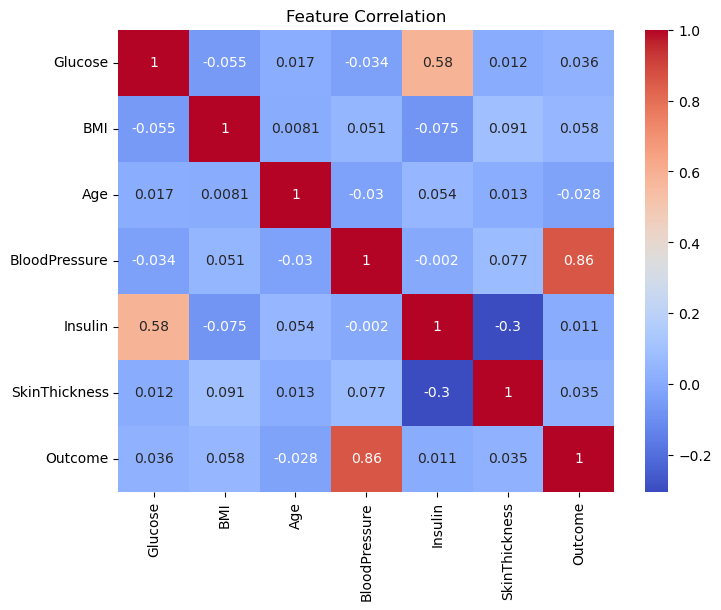

In [5]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

In [8]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Classification Report:", classification_report(y_test, y_pred))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred))

# AUC Score
y_proba = model.predict_proba(X_test)[:, 1]
print("📈 ROC AUC Score:", roc_auc_score(y_test, y_proba))

Classification Report:               precision    recall  f1-score   support

           0       0.93      0.91      0.92        46
           1       0.93      0.94      0.94        54

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100

Confusion Matrix: [[42  4]
 [ 3 51]]
📈 ROC AUC Score: 0.9879227053140096


## 🟡 Medium Complexity Dataset
**Overview:** This synthetic dataset includes 8 features and introduces:
- Class imbalance (65% vs 35%)
- Noise (5%)
- Slightly harder separation between classes

**Features:** Glucose, BMI, Age, BloodPressure, Insulin, SkinThickness, Cholesterol, Pregnancies

In [9]:
medium_df = pd.read_csv('logistic_regression_medium_dataset.csv')
medium_df.head()

,Glucose,BMI,Age,BloodPressure,Insulin,SkinThickness,Cholesterol,Pregnancies,Outcome
0,6.272245,0.046883,-1.852753,0.165489,3.432119,-4.208159,1.903340,0.813594,1
1,0.550527,-1.493740,1.531789,0.183799,0.163854,1.359926,0.576339,2.114748,1
2,2.277001,-1.001620,-1.638707,-0.158651,1.428054,-2.233211,-1.882309,-3.493399,0
3,0.536201,0.536346,-0.828702,-0.278884,2.433578,0.301426,2.141697,-0.047407,1
4,7.636102,-2.850330,-2.528618,1.963086,1.599716,-3.476584,-2.684187,0.615484,1


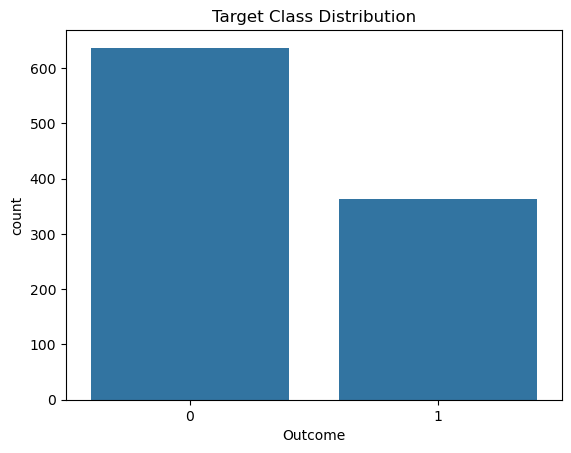

,Glucose,BMI,Age,BloodPressure,Insulin,SkinThickness,Cholesterol,Pregnancies,Outcome
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.829049,-0.806678,0.746547,-0.042531,0.748527,0.009223,0.563163,0.398221,0.363000
std,2.767745,1.502970,1.761441,1.042954,1.485893,1.720418,2.117142,1.700891,0.481105
min,-8.512927,-4.616512,-4.141477,-3.582063,-3.689284,-6.014203,-7.246002,-4.861168,0.000000
25%,-0.554935,-1.797164,-0.488563,-0.734871,-0.167610,-1.267625,-0.768945,-0.754509,0.000000
50%,1.124001,-1.045863,0.722102,-0.030551,0.920147,-0.029185,0.641288,0.607002,0.000000
75%,2.439592,-0.197919,1.873518,0.642444,1.683588,1.257942,1.975009,1.618948,1.000000
max,8.450596,5.885693,5.808412,3.240139,6.236793,5.037464,7.665888,5.266061,1.000000


In [10]:
# Visualize class distribution
sns.countplot(data=medium_df, x='Outcome')
plt.title('Target Class Distribution')
plt.show()

# Summary stats
medium_df.describe()

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Split
medium_X = medium_df.drop('Outcome', axis=1)
medium_y = medium_df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(medium_X, medium_y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

In [18]:
# Evaluation
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧾 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📈 ROC AUC Score:", roc_auc_score(y_test, y_proba))


📊 Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86       130
           1       0.72      0.79      0.75        70

    accuracy                           0.82       200
   macro avg       0.80      0.81      0.81       200
weighted avg       0.82      0.82      0.82       200


🧾 Confusion Matrix:
 [[109  21]
 [ 15  55]]

📈 ROC AUC Score: 0.8740659340659341


## 🔴 Complex Dataset Overview
**Scenario**: This synthetic dataset emulates a real-world high-stakes classification case, such as fraud or rare disease detection.

**Characteristics:**
- 2000 samples
- 20 features (informative + redundant)
- Heavy class imbalance: 90% vs 10%
- 10% label noise

This complexity challenges both generalization and evaluation of Logistic Regression models.

In [19]:
df_complex = pd.read_csv('logistic_regression_complex_dataset.csv')
df_complex.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Outcome
0,-0.221133,-1.193592,-0.369172,-2.560388,-0.806328,0.607880,1.733883,-0.251114,-1.605569,2.004653,...,2.449062,0.798669,0.311935,-0.167249,-0.870726,-0.271044,-1.139875,-0.841817,0.516528,0
1,-1.547224,0.773266,1.763371,2.467132,2.338263,-0.673822,-0.875419,-1.162331,5.272885,-4.011189,...,-1.819686,0.524982,3.331595,-4.835744,-2.246911,0.871899,6.251249,-0.958796,2.590002,0
2,0.589023,0.580422,-0.564948,1.586522,1.545381,0.397404,0.045739,1.037111,0.462142,-4.619606,...,-1.911422,-0.139450,0.366634,0.146858,-3.781484,2.364864,3.105184,-3.154118,-1.069614,0
3,-2.026023,-0.647293,1.055517,0.547164,-3.225189,-0.807595,-0.274984,0.294290,9.391403,-4.464906,...,-5.616602,1.085074,0.472264,2.274378,-0.196486,1.610994,9.488018,-5.750039,3.554828,1
4,-1.064994,1.873415,1.313109,0.668154,-0.069558,-0.964506,1.083218,-4.409095,-0.276223,-4.220245,...,5.149194,-4.452558,2.346129,-3.036125,-5.738073,-2.985661,-3.166884,6.612316,-0.423611,1


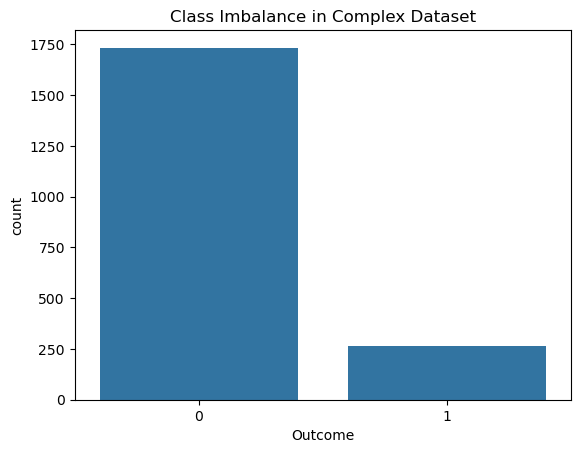

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000
mean,-0.042398,0.022864,-0.048736,0.053847,-0.101227,0.014792,-0.018364,0.020721,0.940344,-0.887398,...,0.076413,-0.728173,0.706038,-0.782556,-0.670897,0.620180,0.456616,0.188688,-0.007897,0.13300
std,1.006188,0.998120,1.715731,2.253184,1.969371,0.983047,0.974353,1.769633,3.004736,3.214375,...,2.050435,1.894989,1.940561,3.654145,1.960757,1.854759,4.115382,3.854581,1.850771,0.33966
min,-3.453354,-3.055318,-6.697326,-7.130778,-5.888703,-3.495045,-3.295561,-6.941738,-9.232344,-12.393041,...,-6.229390,-6.764888,-6.198323,-12.737935,-6.893655,-5.554417,-15.655995,-13.294086,-5.659317,0.00000
25%,-0.762007,-0.691095,-1.203921,-1.442600,-1.443453,-0.646751,-0.678927,-1.197652,-0.957630,-3.032216,...,-1.263254,-2.016211,-0.589611,-3.229772,-2.035610,-0.572214,-2.016671,-2.322009,-1.239268,0.00000
50%,-0.049407,0.013075,0.003442,0.171259,-0.145594,0.015189,0.012547,0.001211,0.745748,-0.925932,...,0.093181,-0.725099,0.664988,-0.637324,-0.600347,0.579413,0.637982,0.127068,-0.063368,0.00000
75%,0.623861,0.718677,1.116308,1.552045,1.233565,0.694638,0.640374,1.186347,2.796369,1.128975,...,1.440984,0.562917,1.975231,1.723594,0.718340,1.856150,3.031071,2.850278,1.233980,0.00000
max,3.611350,3.691625,6.481781,6.993050,6.628231,3.132326,2.685305,6.976885,14.599116,10.339851,...,7.191692,5.215289,8.483275,10.078077,7.411748,6.437051,17.203740,12.346760,7.036810,1.00000


In [20]:
# Visualize imbalance
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df_complex, x='Outcome')
plt.title('Class Imbalance in Complex Dataset')
plt.show()

# Basic summary
df_complex.describe()

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Split
complex_X = df_complex.drop('Outcome', axis=1)
complex_y = df_complex['Outcome']
X_train, X_test, y_train, y_test = train_test_split(complex_X, complex_y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluation
print("📊 Classification Report:\n", classification_report(y_test, y_pred))
print("🧾 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("📈 ROC AUC Score:", roc_auc_score(y_test, y_proba))

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       337
           1       0.67      0.13      0.21        63

    accuracy                           0.85       400
   macro avg       0.76      0.56      0.57       400
weighted avg       0.83      0.85      0.81       400

🧾 Confusion Matrix:
 [[333   4]
 [ 55   8]]
📈 ROC AUC Score: 0.7445245160378691


# 🔴 Very Complex Dataset - Text Classification with Logistic Regression

In real-world machine learning pipelines, logistic regression is also used for **text classification problems** like spam detection or sentiment analysis.

We now work with textual data, which requires:
- Text cleaning (lowercasing, punctuation removal, etc.)
- Tokenization
- Transformation using **TF-IDF**
- Logistic regression with a solver optimized for high-dimensional sparse data

### 📦 Dataset
We use the built-in **IMDb reviews** or **SMS Spam Collection** dataset (or mock equivalent).

### 🧪 Modeling Steps
1. Load and clean the text data
2. Transform using `TfidfVectorizer`
3. Fit `LogisticRegression(solver='saga')`
4. Evaluate using metrics like AUC, F1-score, and Confusion Matrix

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Example text data
texts = [
    'Win a free iPhone now!', 'Your appointment is confirmed.', 'Free lottery entry here!',
    'Important update about your account.', 'Congratulations, you won a gift card!',
    'Meeting agenda attached.', 'Limited time offer, click now!',
    'Invoice for your recent purchase.', 'Claim your prize now!', 'Team meeting rescheduled.'
]
labels = [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]  # 1 = spam, 0 = ham

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts)
y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(solver='saga')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nAUC Score:", roc_auc_score(y_test, y_proba))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3


Confusion Matrix:
 [[1 1]
 [0 1]]

AUC Score: 1.0


/Users/anirudhyadav/anaconda3/envs/agentic_ai_rag/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
